<a href="https://colab.research.google.com/github/jayaraju123/Road-Detection-System/blob/main/IOTDeviceTempForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IOT-temp.csv to IOT-temp.csv


In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv('IOT-temp.csv')
print(f'IOT-temp.csv : {df.shape}')
df.head(3)


IOT-temp.csv : (97606, 5)


,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out


In [ ]:
df.shape

(97606, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


In [ ]:
df.isnull().sum()

,0
id,0
room_id/id,0
noted_date,0
temp,0
out/in,0


In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df["noted_date"] = pd.to_datetime(df["noted_date"], format="%d-%m-%Y %H:%M")
df["year"] = df["noted_date"].apply(lambda date: date.year)
df["month"] = df["noted_date"].apply(lambda date: date.month)
df["day"] = df["noted_date"].apply(lambda date: date.day_name())
df["week_of_year"] = df["noted_date"].apply(lambda date: date.weekofyear)
df["hour"] = df["noted_date"].apply(lambda date: date.hour)
df["minute"] = df["noted_date"].apply(lambda date: date.minute)


In [ ]:
df.head()


,id,room_id/id,noted_date,temp,out/in,year,month,day,week_of_year,hour,minute
0,__export__.temp_log_196134_bd201015,Room Admin,2018-12-08 09:30:00,29,In,2018,12,Saturday,49,9,30
1,__export__.temp_log_196131_7bca51bc,Room Admin,2018-12-08 09:30:00,29,In,2018,12,Saturday,49,9,30
2,__export__.temp_log_196127_522915e3,Room Admin,2018-12-08 09:29:00,41,Out,2018,12,Saturday,49,9,29
3,__export__.temp_log_196128_be0919cf,Room Admin,2018-12-08 09:29:00,41,Out,2018,12,Saturday,49,9,29
4,__export__.temp_log_196126_d30b72fb,Room Admin,2018-12-08 09:29:00,31,In,2018,12,Saturday,49,9,29


In [ ]:
df["room_id/id"].value_counts()


,count
room_id/id,
Room Admin,97605


In [ ]:
df.drop(["id", "room_id/id"], axis=1, inplace=True)


In [ ]:
df.head()


,noted_date,temp,out/in,year,month,day,week_of_year,hour,minute
0,2018-12-08 09:30:00,29,In,2018,12,Saturday,49,9,30
1,2018-12-08 09:30:00,29,In,2018,12,Saturday,49,9,30
2,2018-12-08 09:29:00,41,Out,2018,12,Saturday,49,9,29
3,2018-12-08 09:29:00,41,Out,2018,12,Saturday,49,9,29
4,2018-12-08 09:29:00,31,In,2018,12,Saturday,49,9,29


In [ ]:
monthly_temp_mean = df.groupby(["out/in", "month"], as_index=False)[["temp"]].mean()
monthly_temp_mean

,out/in,month,temp
0,In,7,31.125000
1,In,8,29.942907
2,In,9,30.671172
3,In,10,31.528517
4,In,11,30.429499
5,In,12,28.401540
6,Out,7,31.888889
7,Out,8,31.157604
8,Out,9,31.223356
9,Out,10,39.870501


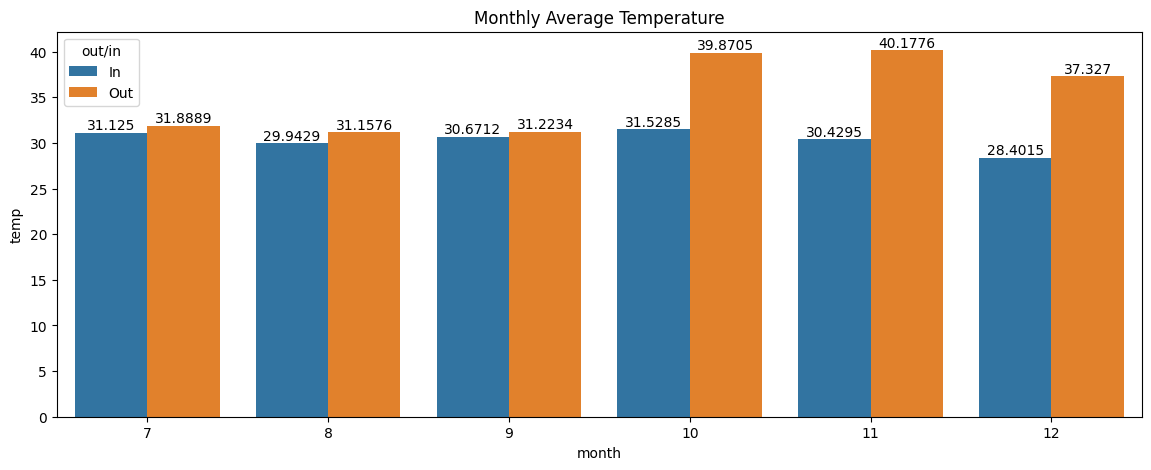

In [ ]:
plt.figure(figsize=(14, 5))
ax = sns.barplot(data=monthly_temp_mean, x="month", y="temp", hue="out/in")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Monthly Average Temperature")
plt.show()

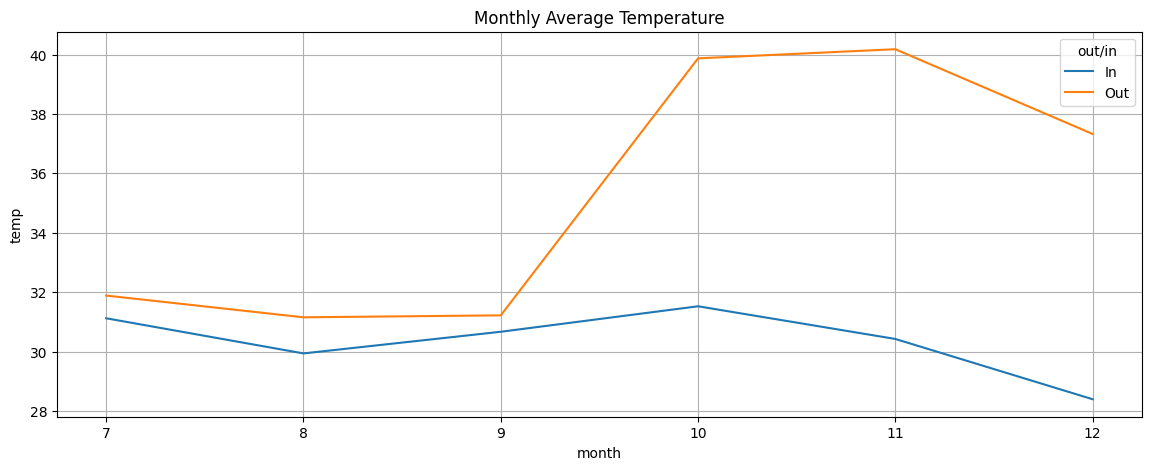

In [ ]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=monthly_temp_mean, x="month", y="temp", hue="out/in")
plt.title("Monthly Average Temperature")
plt.grid()
plt.show()

In [ ]:
weekly_temp_mean = df[df["month"] == 10].groupby(["week_of_year", "day", "out/in"], as_index=False)[["temp"]].mean()
weekly_temp_mean

,week_of_year,day,out/in,temp
0,41,Friday,In,34.295238
1,41,Friday,Out,45.702899
2,41,Saturday,In,34.566038
3,41,Saturday,Out,46.178683
4,41,Sunday,In,35.000000
5,41,Sunday,Out,44.067797
6,41,Thursday,In,34.900000
7,41,Thursday,Out,44.944000
8,41,Tuesday,In,31.957746
9,41,Tuesday,Out,41.207508


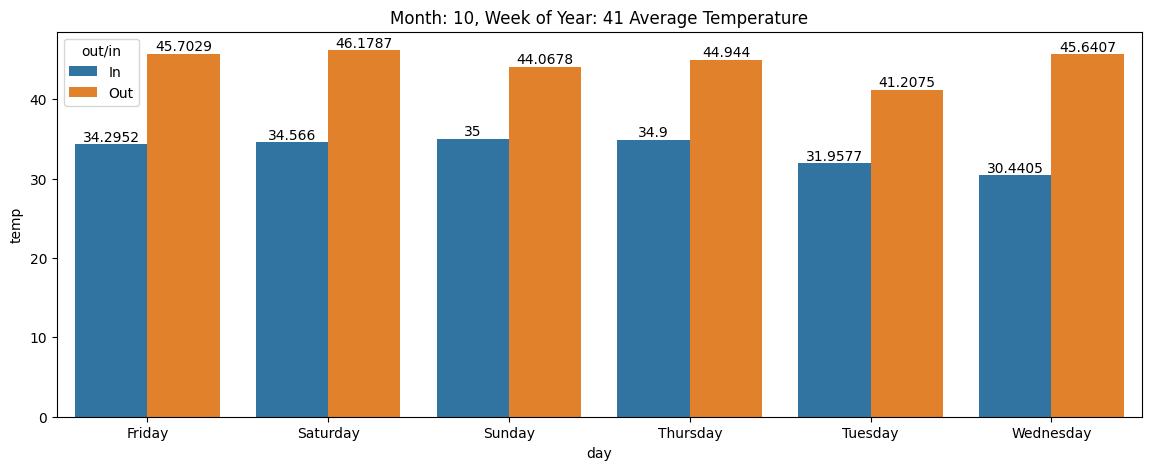

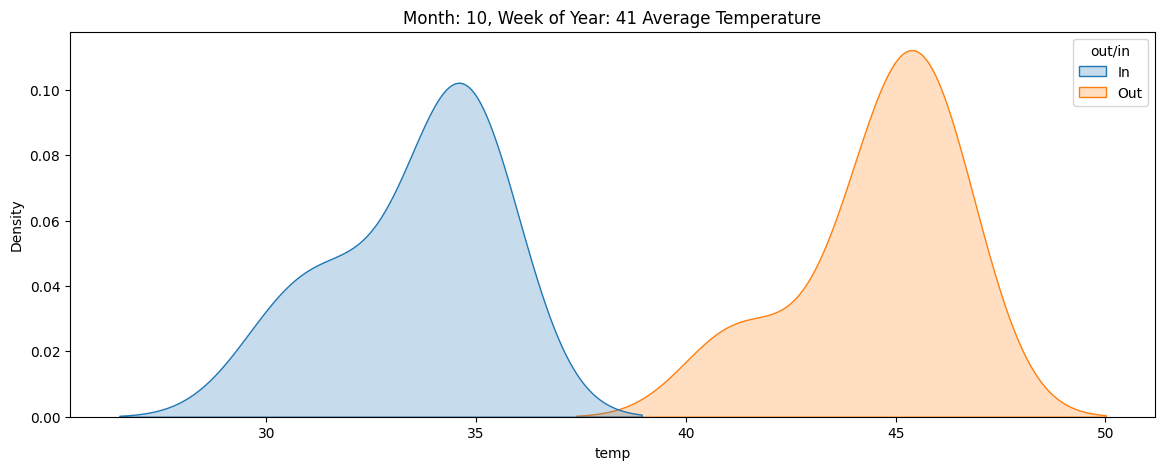

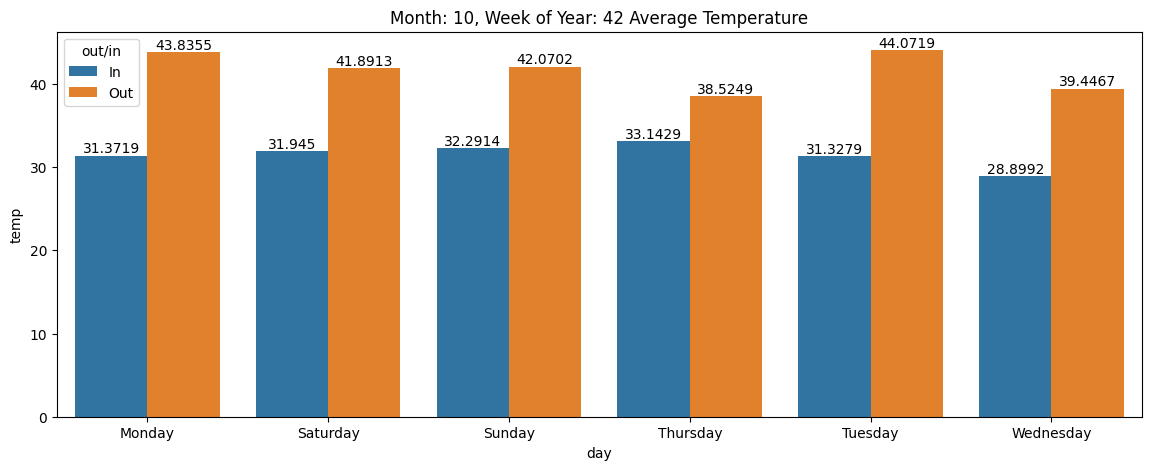

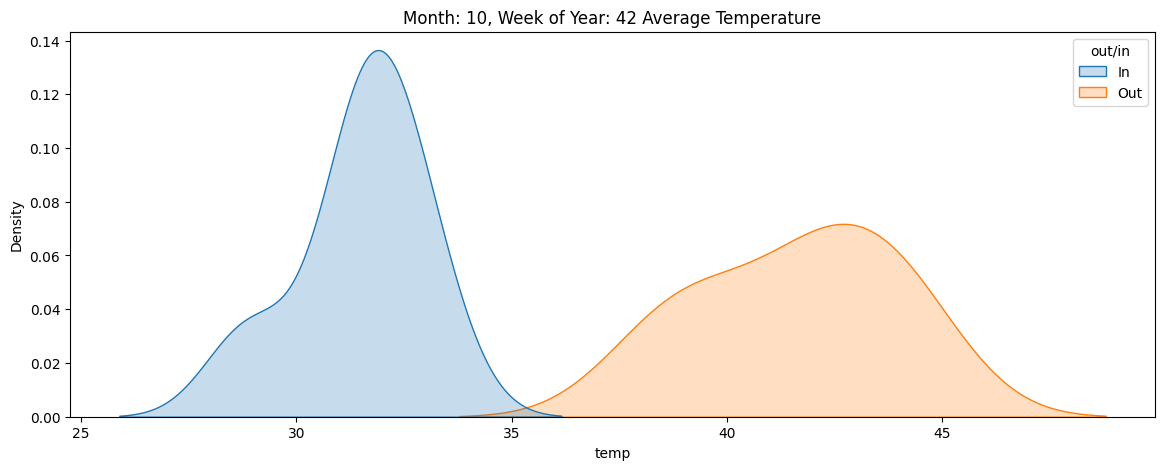

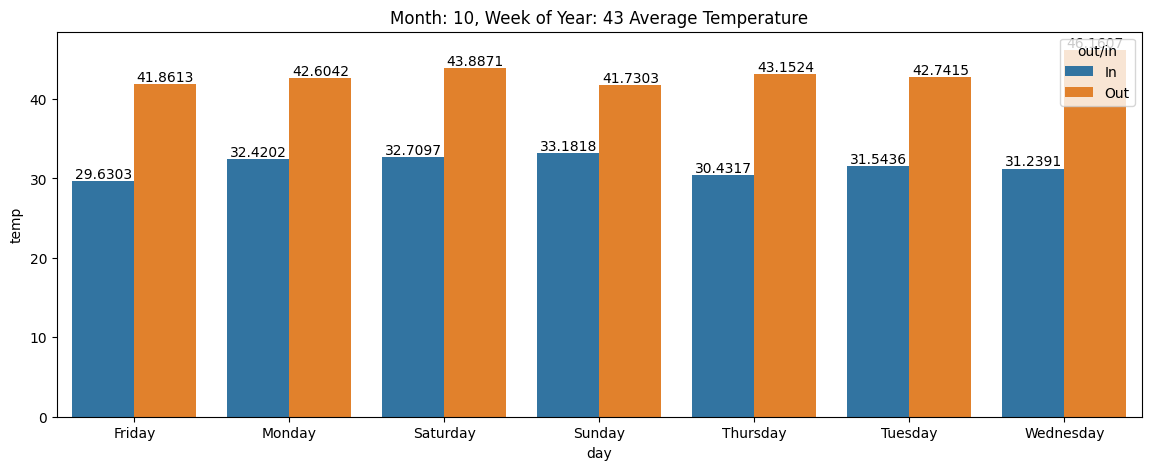

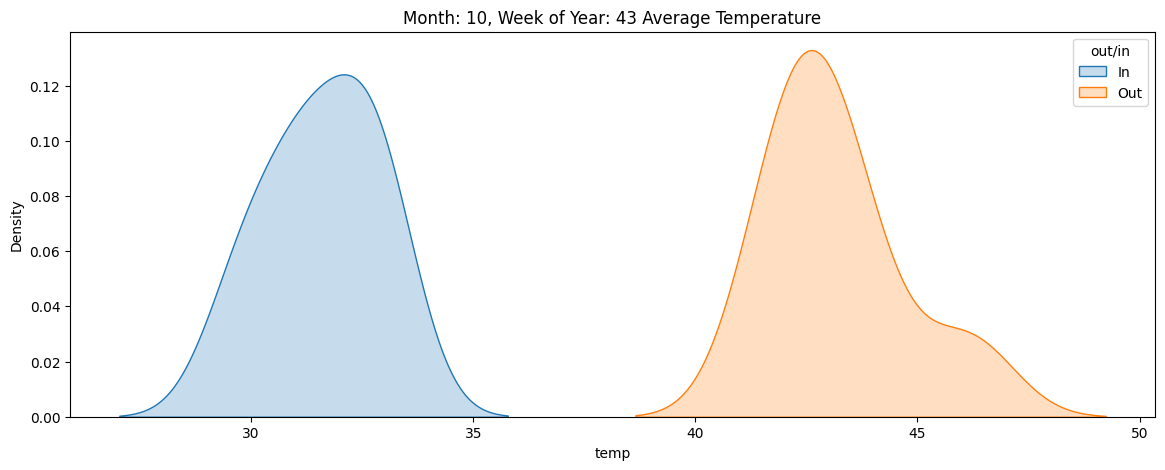

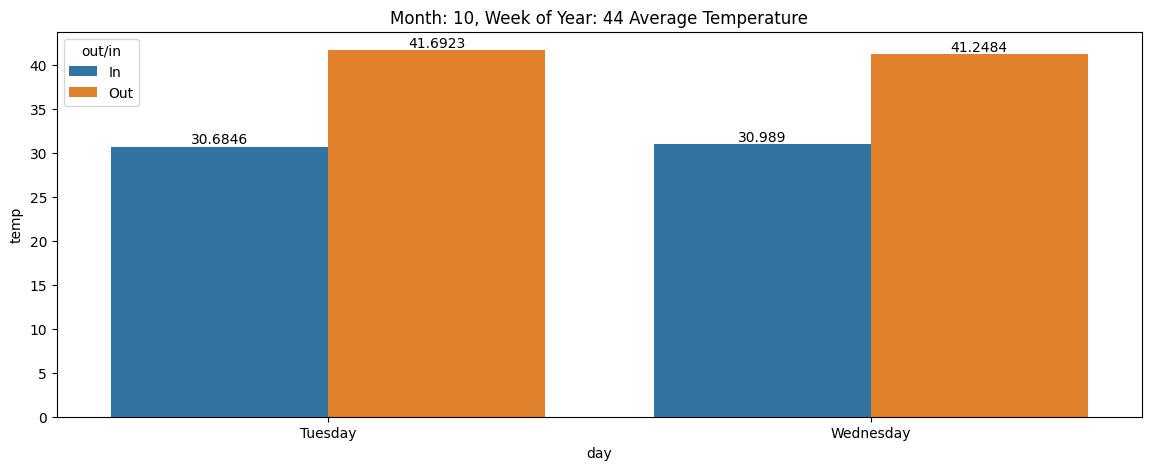

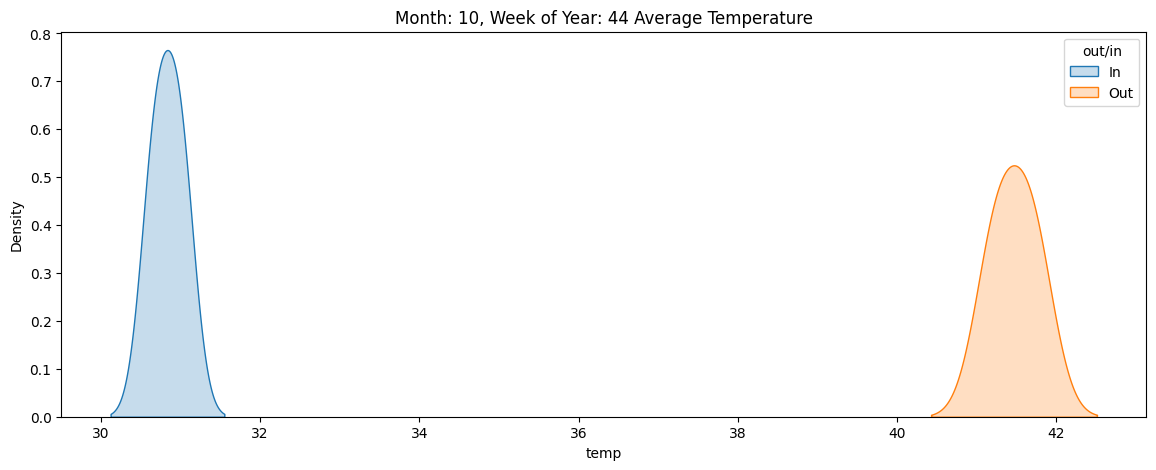

In [ ]:
for week in weekly_temp_mean["week_of_year"].unique():
    weekly_temp = weekly_temp_mean[weekly_temp_mean["week_of_year"] == week]
    plt.figure(figsize=(14, 5))
    ax = sns.barplot(data=weekly_temp, x="day", y="temp", hue="out/in")
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f"Month: 10, Week of Year: {week} Average Temperature")
    plt.show()

    plt.figure(figsize=(14, 5))
    sns.kdeplot(data=weekly_temp, x="temp", hue="out/in", fill=True)
    plt.title(f"Month: 10, Week of Year: {week} Average Temperature")
    plt.show()


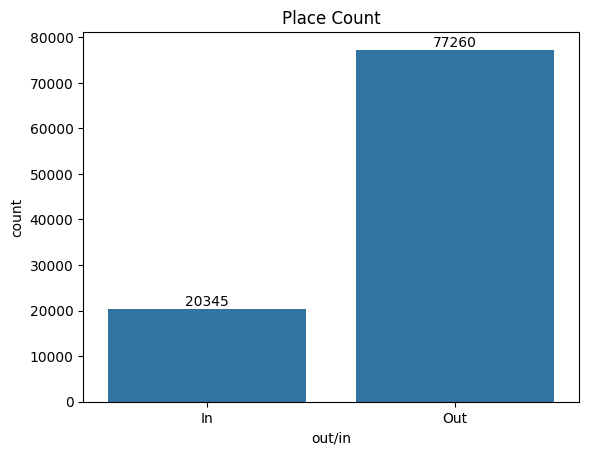

In [ ]:
plt.figure()
ax = sns.countplot(data=df, x="out/in")
ax.bar_label(ax.containers[0])
plt.title("Place Count")
plt.show()

In [ ]:
weekofyear_temp_mean = df.groupby(["week_of_year", "out/in"], as_index=False)[["temp"]].mean()
weekofyear_temp_mean

,week_of_year,out/in,temp
0,30,In,31.176471
1,30,Out,31.633333
2,31,In,30.923077
3,31,Out,32.319149
4,32,In,29.389205
5,32,Out,31.461326
6,33,In,30.666667
7,33,Out,31.015929
8,34,In,31.265823
9,34,Out,30.860656


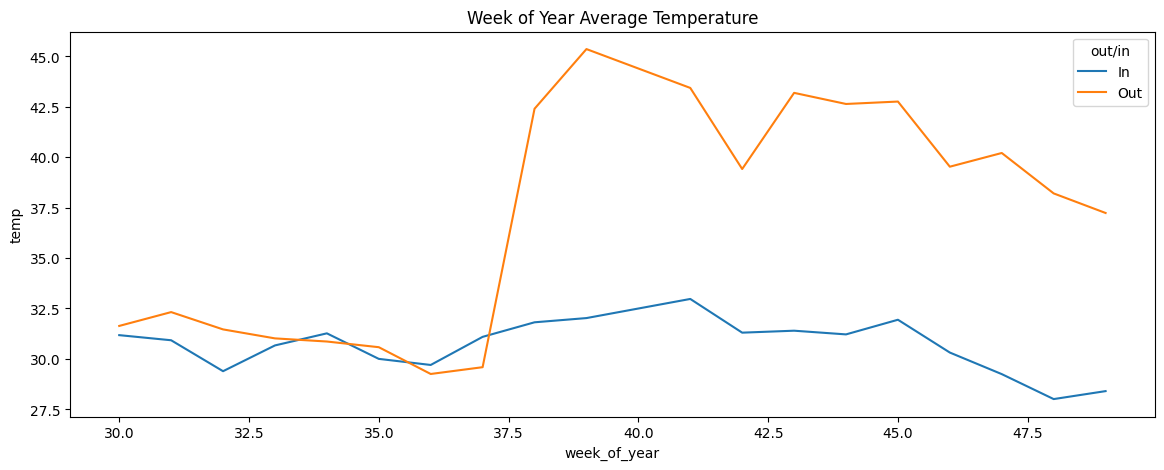

In [ ]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=weekofyear_temp_mean, x="week_of_year", y="temp", hue="out/in")
plt.title("Week of Year Average Temperature")
plt.show()

In [ ]:
df.head()

,noted_date,temp,out/in,year,month,day,week_of_year,hour,minute
0,2018-12-08 09:30:00,29,In,2018,12,Saturday,49,9,30
1,2018-12-08 09:30:00,29,In,2018,12,Saturday,49,9,30
2,2018-12-08 09:29:00,41,Out,2018,12,Saturday,49,9,29
3,2018-12-08 09:29:00,41,Out,2018,12,Saturday,49,9,29
4,2018-12-08 09:29:00,31,In,2018,12,Saturday,49,9,29


In [ ]:
in_temperatures = df[df["out/in"] == "In"][["temp"]]
out_temperatures = df[df["out/in"] == "Out"][["temp"]]

In [ ]:
in_temperatures = np.array(in_temperatures).reshape(-1, 1)
out_temperatures = np.array(out_temperatures).reshape(-1, 1)

In [ ]:
in_scaler = MinMaxScaler()
out_scaler = MinMaxScaler()

in_temperatures_scaled = in_scaler.fit_transform(in_temperatures)
out_temperatures_scaled = out_scaler.fit_transform(out_temperatures)

In [ ]:
in_train_size = int(len(in_temperatures_scaled) * 0.8)
out_train_size = int(len(out_temperatures_scaled) * 0.8)

In [ ]:
in_test_size = len(in_temperatures_scaled) - in_train_size
out_test_size = len(out_temperatures_scaled) - out_train_size

In [ ]:
print("In Train Size:", in_train_size)
print("In Test Size:", in_test_size)
print("Out Train Size:", out_train_size)
print("Out Test Size:", out_test_size)

In Train Size: 16276
In Test Size: 4069
Out Train Size: 61808
Out Test Size: 15452


In [ ]:
in_train = in_temperatures_scaled[0:in_train_size, :]
in_test = in_temperatures_scaled[in_train_size:len(in_temperatures_scaled), :]

In [ ]:
out_train = out_temperatures_scaled[0:out_train_size, :]
out_test = out_temperatures_scaled[out_train_size:len(out_temperatures_scaled), :]

In [ ]:
def dataset(data, steps=1):
    data_x, data_y = [], []
    for i in range(len(data) - steps - 1):
        a = data[i:(i + steps), 0]
        b = data[i + steps, 0]
        data_x.append(a)
        data_y.append(b)

    data_x = np.array(data_x)
    data_y = np.array(data_y)
    return data_x, data_y

In [ ]:
X_train_in, y_train_in = dataset(in_train)
X_test_in, y_test_in = dataset(in_test)

In [ ]:
X_train_out, y_train_out = dataset(out_train)
X_test_out, y_test_out = dataset(out_test)

In [ ]:
in_model = Sequential()
in_model.add(LSTM(16, input_shape=(1, 1)))
in_model.add(Dense(1))
in_model.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
out_model = Sequential()
out_model.add(LSTM(64, input_shape=(1, 1)))
out_model.add(Dense(1))
out_model.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

In [ ]:
early = EarlyStopping(monitor="val_loss", patience=3)


In [ ]:
in_history = in_model.fit(X_train_in, y_train_in, epochs=100, validation_split=0.2, callbacks=[early])


Epoch 1/100
407/407 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 1.4268e-04 - loss: 0.0743 - val_accuracy: 0.0000e+00 - val_loss: 0.0026
Epoch 2/100
407/407 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 2.8563e-04 - loss: 0.0044 - val_accuracy: 0.0000e+00 - val_loss: 0.0018
Epoch 3/100
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 2.4940e-04 - loss: 0.0026 - val_accuracy: 0.0000e+00 - val_loss: 0.0015
Epoch 4/100
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 3.8435e-05 - loss: 0.0017 - val_accuracy: 0.0000e+00 - val_loss: 0.0014
Epoch 5/100
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 2.6785e-04 - loss: 0.0015 - val_accuracy: 0.0000e+00 - val_loss: 0.0014
Epoch 6/100
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 2.7817e-04 - loss: 0.0016 - val_accuracy: 0.0000e+00 - val_loss: 0.0014
Epoch 7/100
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.6159e-04 - loss: 0.0015 - val_accuracy: 0.0000e+00 - val_loss: 0.0015


In [ ]:
out_history = out_model.fit(X_train_out, y_train_out, epochs=100, validation_split=0.2, callbacks=[early])

Epoch 1/100
1546/1546 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 4.3642e-05 - loss: 0.0338 - val_accuracy: 0.0000e+00 - val_loss: 0.0030
Epoch 2/100
1546/1546 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 3.7406e-05 - loss: 5.7277e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0023
Epoch 3/100
1546/1546 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 5.0012e-05 - loss: 5.7050e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0024
Epoch 4/100
1546/1546 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 7.3207e-05 - loss: 5.5581e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0021
Epoch 5/100
1546/1546 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 2.0209e-05 - loss: 5.5551e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0020
Epoch 6/100
1546/1546 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 4.1840e-06 - loss: 5.8836e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0019
Epoch 7/100
1546/1546 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 1.5747e-05 - loss: 5.8110e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0016
Ep

In [ ]:
y_pred_in = in_model.predict(X_test_in)
y_pred_in = in_scaler.inverse_transform(y_pred_in)

y_test_in = y_test_in.reshape(-1, 1)
y_test_in = in_scaler.inverse_transform(y_test_in)
print("R2 Score:", r2_score(y_test_in, y_pred_in))

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R2 Score: 0.9086654901144308


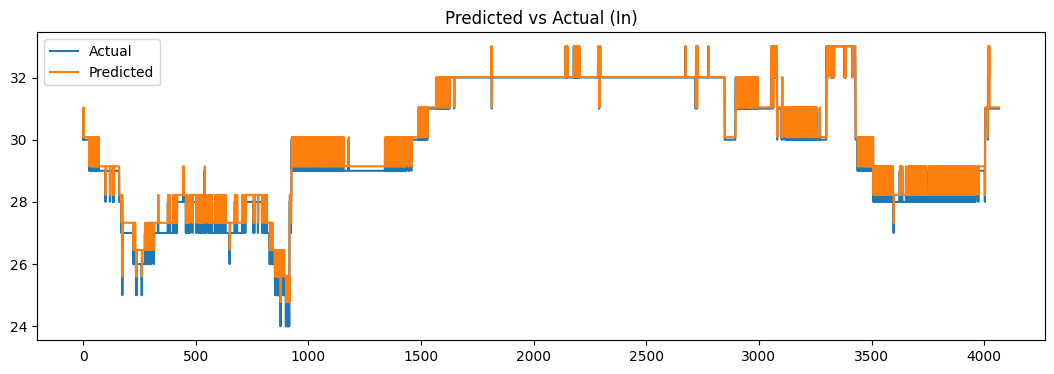

In [ ]:
plt.figure(figsize=(13, 4))
plt.plot(y_test_in, label="Actual")
plt.plot(y_pred_in, label="Predicted")
plt.title("Predicted vs Actual (In)")
plt.legend()
plt.show()

In [ ]:
y_pred_out = out_model.predict(X_test_out)
y_pred_out = out_scaler.inverse_transform(y_pred_out)

y_test_out = y_test_out.reshape(-1, 1)
y_test_out = out_scaler.inverse_transform(y_test_out)
print("R2 Score:", r2_score(y_test_out, y_pred_out))

483/483 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
R2 Score: 0.6621923198799815


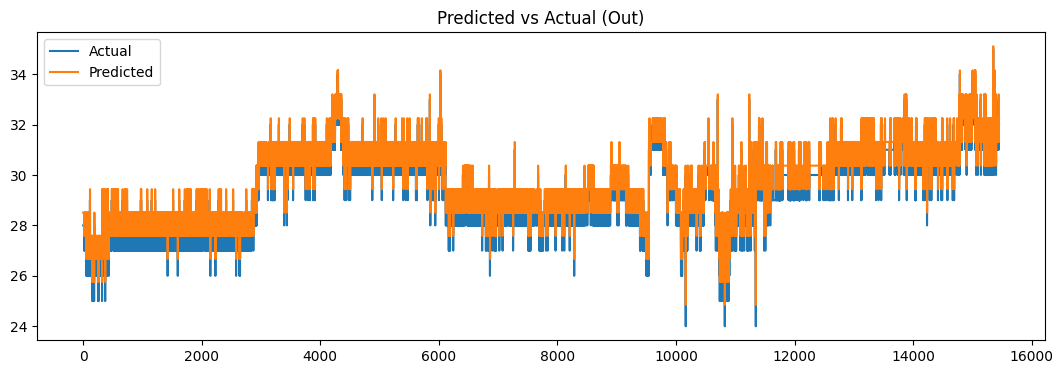

In [ ]:
plt.figure(figsize=(13, 4))
plt.plot(y_test_out, label="Actual")
plt.plot(y_pred_out, label="Predicted")
plt.title("Predicted vs Actual (Out)")
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')